---
# Universidad Nacional de Rosario
---
## Facultad de Ciencias Exactas, Ingeniería y Agrimensura
---
# Tecnicatura Universitaria en Inteligencia Artificial
---
# Programación II
---
# Proyecto Final: *Análisis de datos.*
---
### Alumnos:

Fabián Alvarez - legajo: A-4501/2

Maximiliano Romano - legajo: R-4634/5


## Dominio de aplicación
La temática elegida es la Copa Mundial de la FIFA 2022. Los mejores jugadores y entrenadores del mundo se dieron cita en noviembre de ese año en Catar para celebrar la 22da edición del mundial de fútbol.
Se buscará abordar el máximo evento deportivo del mundo desde la perspectiva del análisis de datos. Dada la gran cantidad de información y estadísticas que hay sobre el deporte, se tratarán de encontrar las claves del recorrido de la selección Argentina hasta la obtención del título.


## Dataset
El dataset elegido es: https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset

Pertenece al usuario IRON486 subido a la web de kaggle.

El conjunto de datos se obtuvo mediante el uso de la web scraping en www.fifa.com.

## Objetivo
En un deporte donde son fundamentales algunos aspectos que no se pueden medir como el talento, la convicción de ganar y la capacidad de sobreponerse a las dificultades de los partidos, se buscarán datos que expliquen por qué la selección Argentina consiguió su mayor logro en los últimos 36 años.

## Cargamos los datos y generamos el dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 nov 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 nov 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 nov 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 nov 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 nov 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


## Composición
El dataframe tiene 64 filas y 88 columnas

In [ ]:
df.shape

(64, 88)

## No hay datos nulos

In [ ]:
df.isna().sum()
# No hay datos nulos

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

## No hay datos duplicados

In [ ]:
df.duplicated().sum()

0

## Tipos de datos de cada variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

## Filtramos los datos de la Selección Argentina

In [ ]:
# Creamos un nuevo dataframe solo con los 7 partidos de argentina
df_argentina = df[(df['team1'] == 'ARGENTINA') | (df['team2'] == 'ARGENTINA')]
df_argentina

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 nov 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361
23,ARGENTINA,MEXICO,50%,36%,14%,2,0,26 nov 2022,20 : 00,Group C,...,0,0,4,5,0,0,63,79,220,327
38,POLAND,ARGENTINA,24%,67%,9%,0,2,30 nov 2022,20 : 00,Group C,...,0,0,25,4,0,0,67,48,438,141
49,ARGENTINA,AUSTRALIA,53%,35%,12%,2,1,03 DEC 2022,20 : 00,Round of 16,...,0,0,5,14,1,0,67,73,240,453
57,NETHERLANDS,ARGENTINA,45%,44%,11%,2,2,09 DEC 2022,20 : 00,Quarter-final,...,0,1,15,5,0,0,91,79,401,323
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
63,ARGENTINA,FRANCE,46%,40%,14%,3,3,18 DEC 2022,16 : 00,Final,...,1,2,11,21,0,0,87,104,280,409


In [ ]:
df_argentina.shape

(7, 88)

## Definimos las columnas importantes

In [ ]:
columnas_importantes = [
    'team1', 'team2', 'number of goals team1', 'number of goals team2',
    'possession team1', 'possession team2', 'passes completed team1', 'passes completed team2',
    'assists team1', 'assists team2', 'total attempts team1', 'total attempts team2',
    'fouls against team1', 'fouls against team2', 'goal preventions team1', 'goal preventions team2']

## Seleccionamos las columnas importantes del dataframe

In [ ]:
df_argentina = df_argentina[columnas_importantes].copy()  # .copy() para evitar SettingWithCopyWarning

## Convertimos los valores porcentuales a números

In [ ]:
# Asegurarse de que las columnas de posesión sean cadenas
df_argentina.loc[:, 'possession team1'] = df_argentina['possession team1'].astype(str)
df_argentina.loc[:, 'possession team2'] = df_argentina['possession team2'].astype(str)

# Convertir las columnas de posesión a valores numéricos
df_argentina.loc[:, 'possession team1'] = df_argentina['possession team1'].str.rstrip('%').replace('', '0').astype(float) / 100
df_argentina.loc[:, 'possession team2'] = df_argentina['possession team2'].str.rstrip('%').replace('', '0').astype(float) / 100


## Traducimos los nombres de las columnas

In [ ]:
traducciones = {
    'team1': 'Equipo 1',
    'team2': 'Equipo 2',
    'number of goals team1': 'Goles Equipo 1',
    'number of goals team2': 'Goles Equipo 2',
    'possession team1': 'Posesión Equipo 1',
    'possession team2': 'Posesión Equipo 2',
    'passes completed team1': 'Pases Completados Equipo 1',
    'passes completed team2': 'Pases Completados Equipo 2',
    'assists team1': 'Asistencias Equipo 1',
    'assists team2': 'Asistencias Equipo 2',
    'total attempts team1': 'Intentos Totales Equipo 1',
    'total attempts team2': 'Intentos Totales Equipo 2',
    'fouls against team1': 'Faltas Recibidas Equipo 1',
    'fouls against team2': 'Faltas Recibidas Equipo 2',
    'goal preventions team1': 'Atajadas/Bloqueos Equipo 1',
    'goal preventions team2': 'Atajadas/Bloqueos Equipo 2'
}

df_argentina = df_argentina.rename(columns = traducciones)

# Storytelling

## Fase de grupos: Partido 1 vs Arabia Saudita
La Selección Argentina llega al mundial de Catar 2022 como firme candidata al título, con un invicto de 36 partidos y habiendo ganado la Copa América 2021 y la Finalissima 2022. Pero llegaría la primera sorpresa del mundial: Arabia Saudita gana el partido 2 a 1.

## Filtramos el primer partido

In [ ]:
primer_partido = df_argentina[(df_argentina['Equipo 1'] == 'ARGENTINA') & (df_argentina['Equipo 2'] == 'SAUDI ARABIA') |
                              (df_argentina['Equipo 2'] == 'ARGENTINA') & (df_argentina['Equipo 1'] == 'SAUDI ARABIA')]

## Graficamos

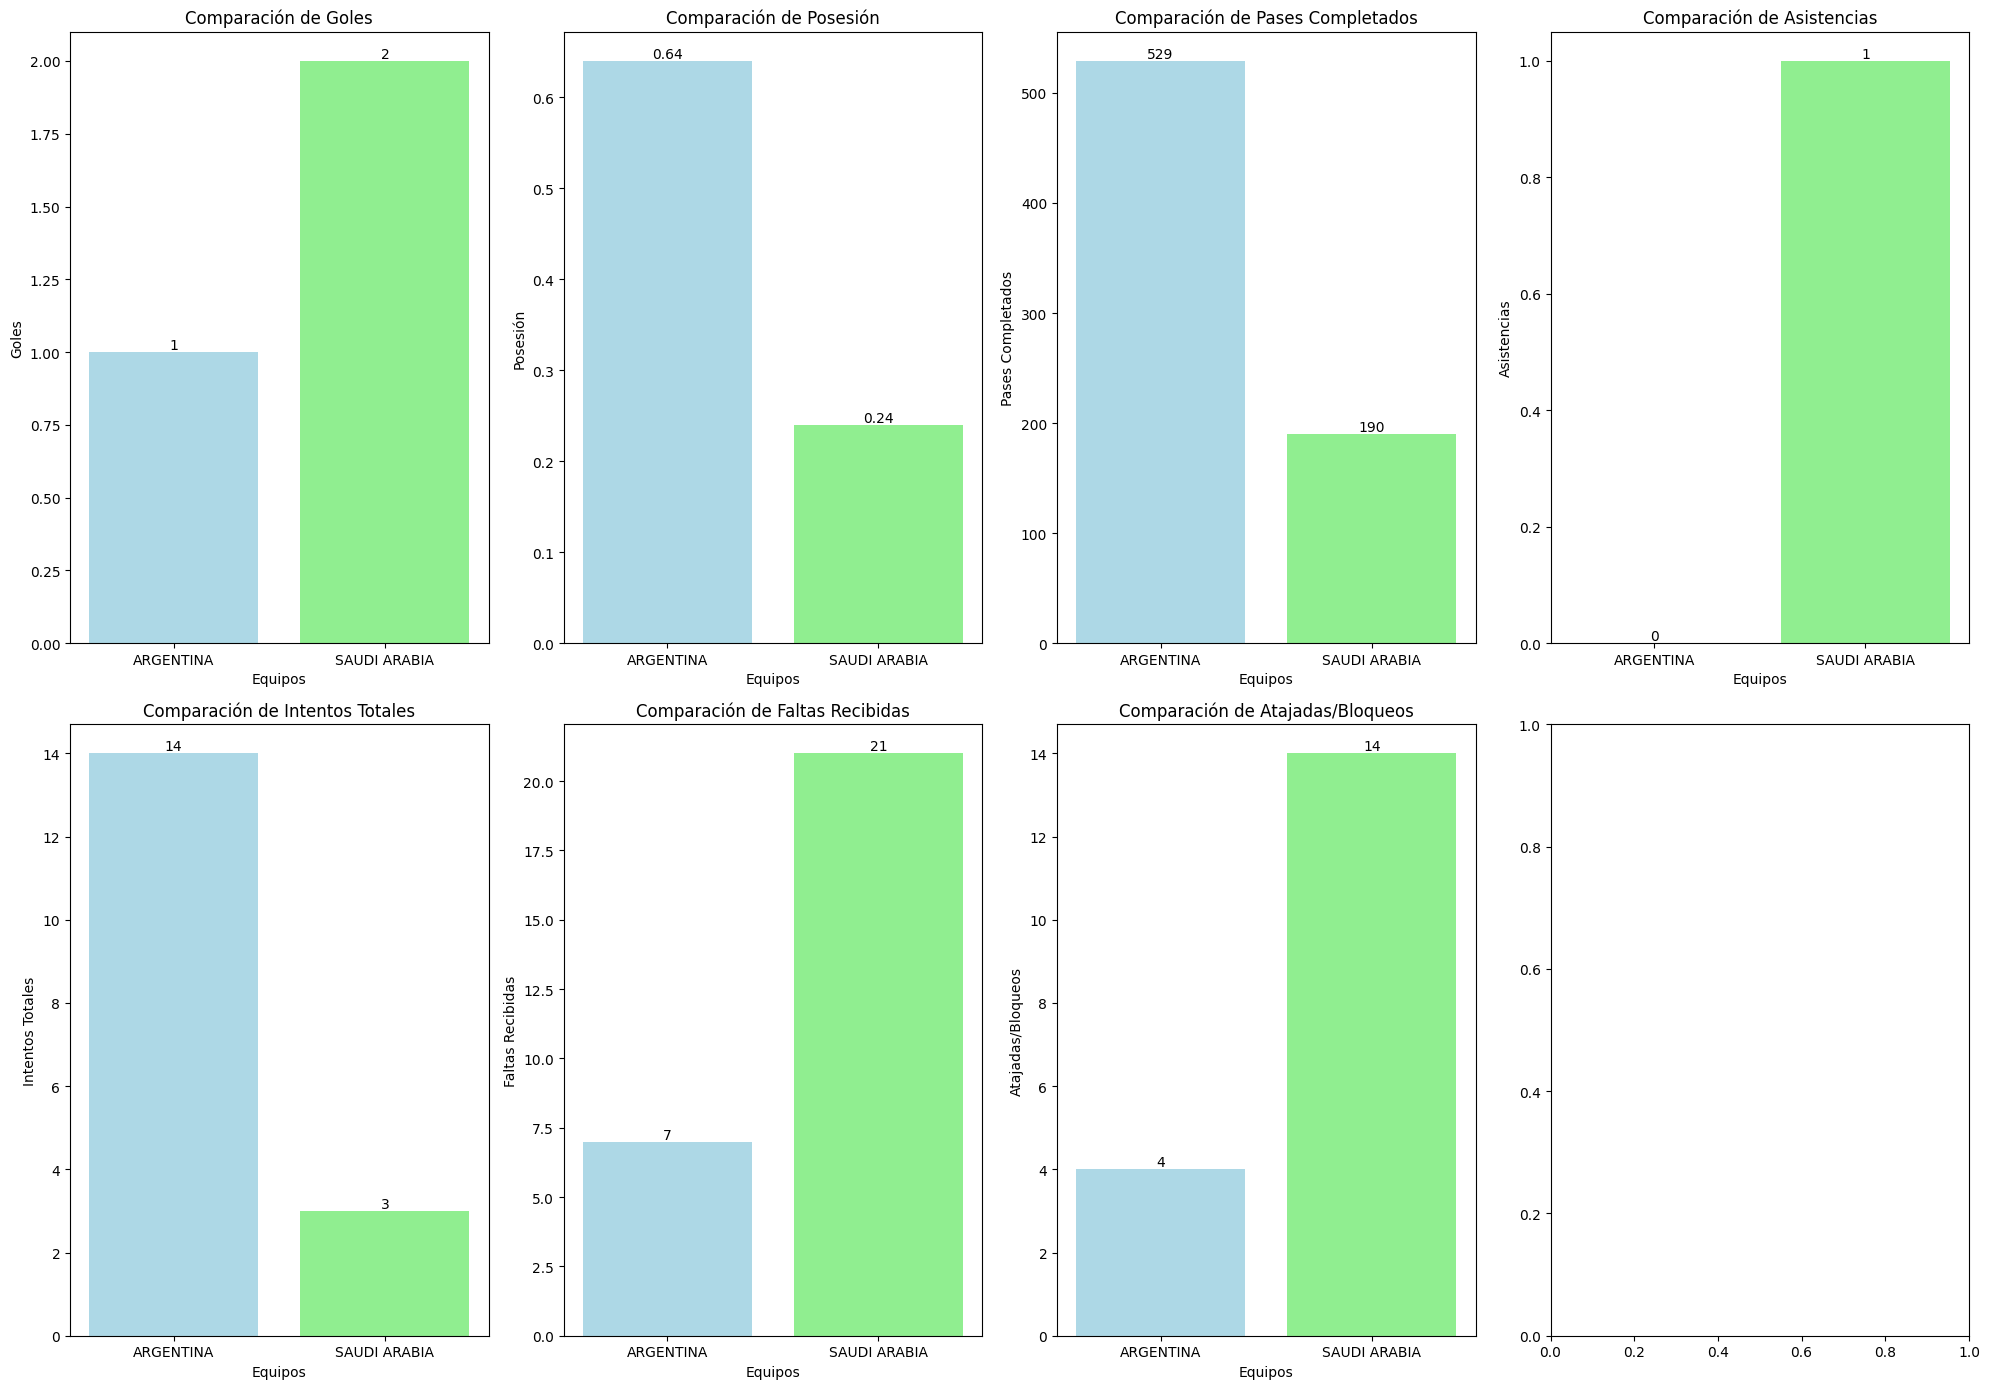

In [ ]:
# Asegurarse de que el partido fue encontrado
if not primer_partido.empty:
    primer_partido = primer_partido.iloc[0]  # Obtener la primera fila como una Serie

    # Definir las columnas a graficar
    columnas_graficos = [
        'Goles', 'Posesión', 'Pases Completados', 'Asistencias',
        'Intentos Totales', 'Faltas Recibidas', 'Atajadas/Bloqueos'
    ]

    # Crear una figura con subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 14))  # 2 filas, 4 columnas

    # Dibujar gráficos para cada columna
    for ax, columna in zip(axs.flatten(), columnas_graficos):
        columna_team1 = columna + ' Equipo 1'
        columna_team2 = columna + ' Equipo 2'

        # Verificar si las columnas existen
        if columna_team1 not in primer_partido.index or columna_team2 not in primer_partido.index:
            print(f"Columnas {columna_team1} o {columna_team2} no existen.")
            continue

        # Extraer datos
        valor_argentina = primer_partido[columna_team1] if primer_partido['Equipo 1'] == 'ARGENTINA' else primer_partido[columna_team2]
        valor_rival = primer_partido[columna_team2] if primer_partido['Equipo 1'] == 'ARGENTINA' else primer_partido[columna_team1]

        # Crear gráfico de barras
        equipos = ['ARGENTINA', 'SAUDI ARABIA']
        valores = [valor_argentina, valor_rival]

        bars = ax.bar(equipos, valores, color=['lightblue', 'lightgreen'])
        ax.set_title(f'Comparación de {columna}')
        ax.set_ylabel(columna)
        ax.set_xlabel('Equipos')

        # Agregar los valores encima de las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.2f}' if isinstance(height, float) else f'{int(height)}',
                    ha='center', va='bottom')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró el partido entre Argentina y Arabia Saudita.")

## Fase de grupos: Partido 2 vs México
El partido más difícil, mucho nerviosismo y poco juego. Obligada a ganar, la Selección Argentina logra imponerse 2 a 0 con goles de Messi y Enzo Fernández.   

In [ ]:
segundo_partido = df_argentina[(df_argentina['Equipo 1'] == 'ARGENTINA') & (df_argentina['Equipo 2'] == 'MEXICO') |
                              (df_argentina['Equipo 2'] == 'ARGENTINA') & (df_argentina['Equipo 1'] == 'MEXICO')]

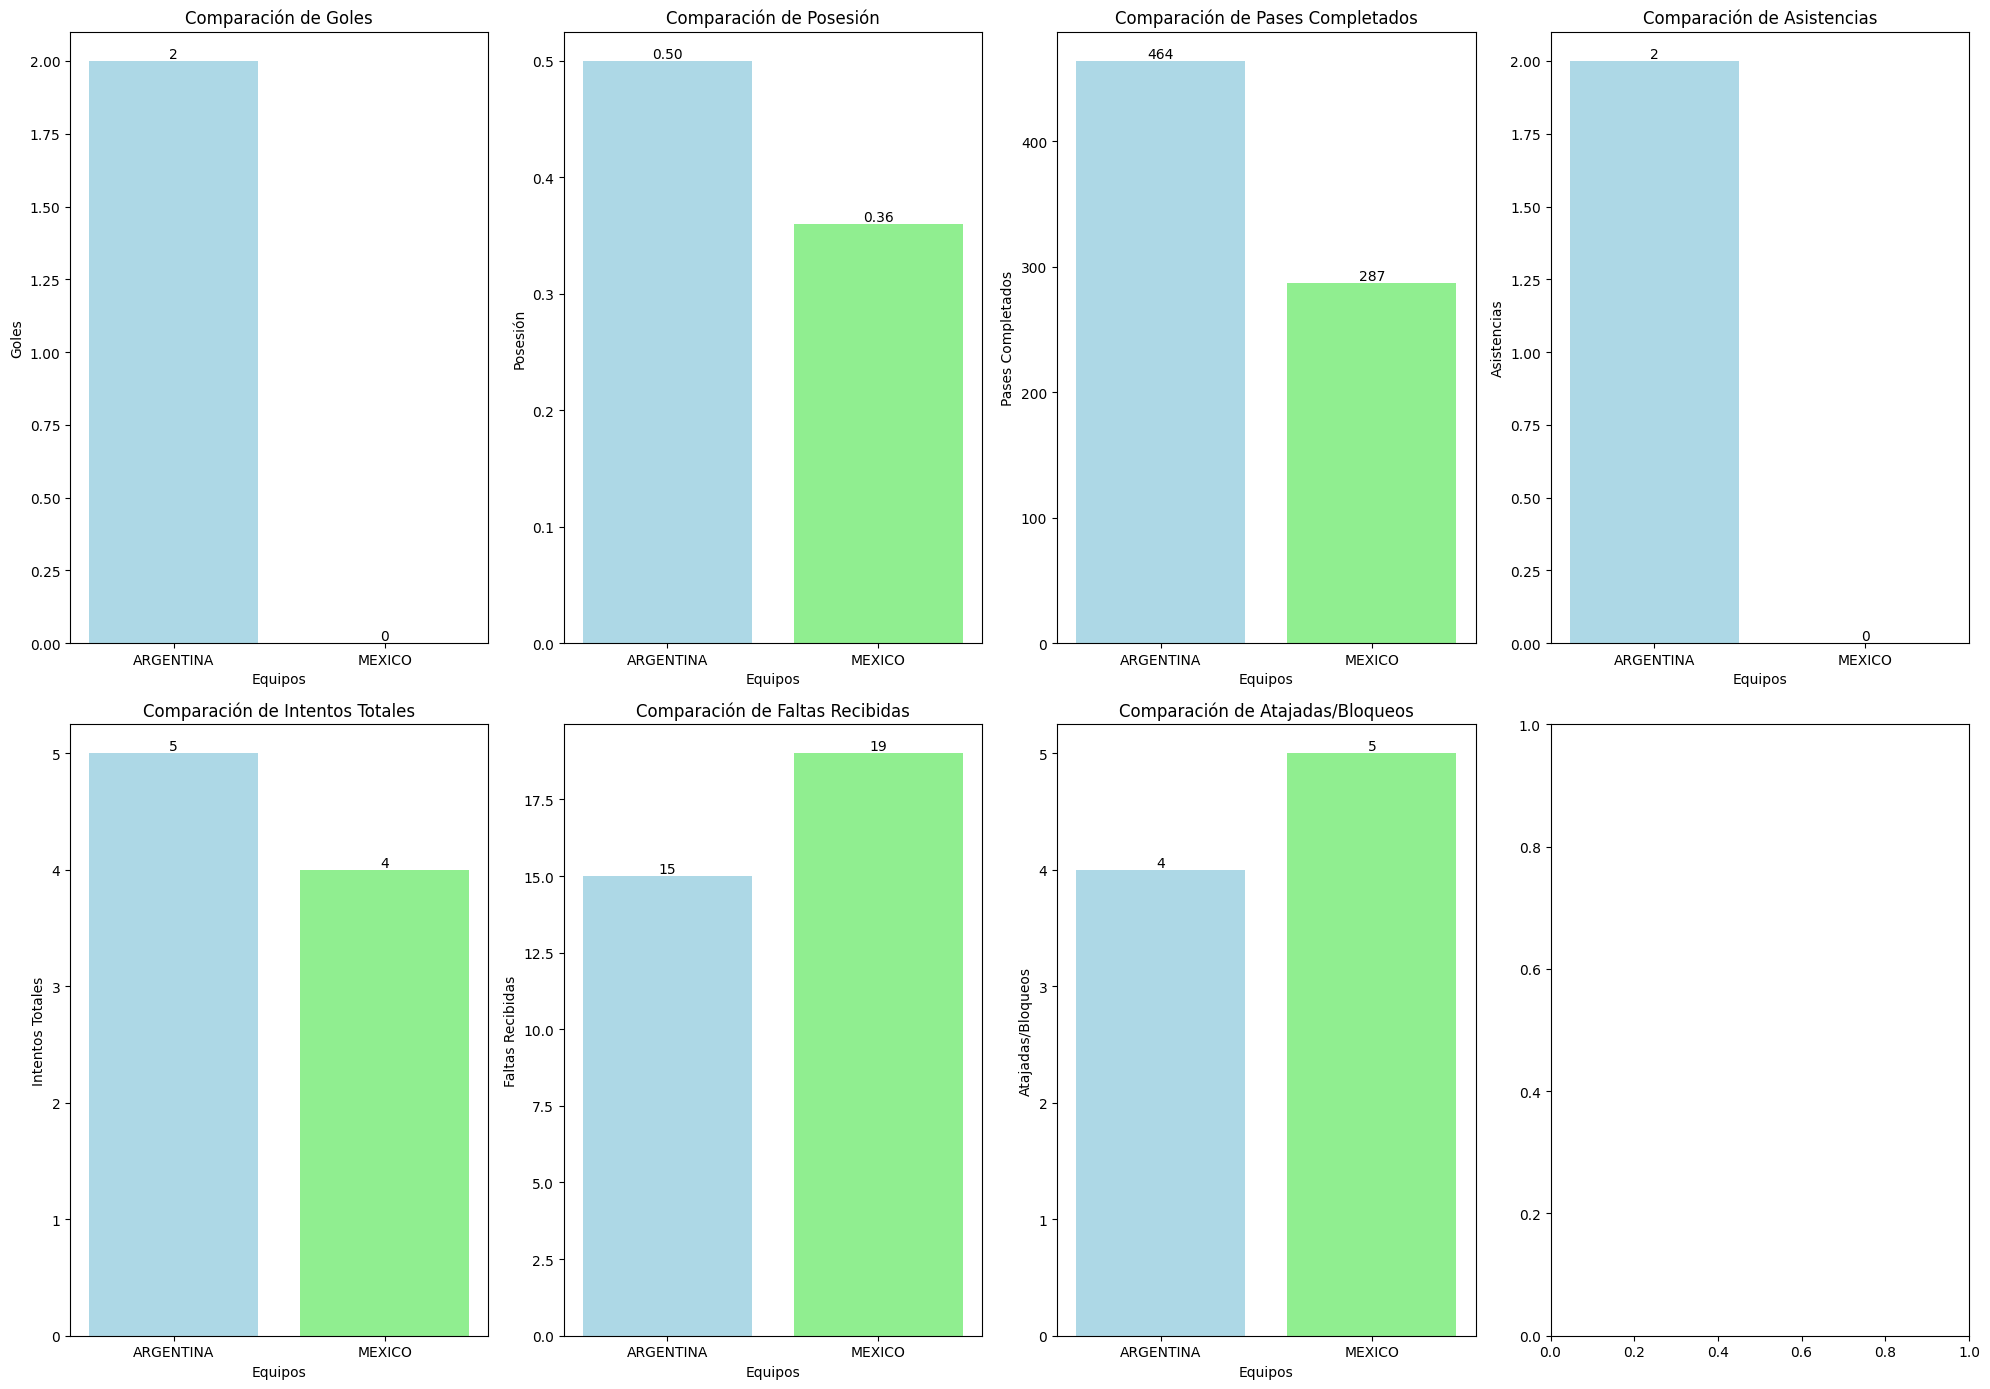

In [ ]:
# Asegurarse de que el partido fue encontrado
if not segundo_partido.empty:
    segundo_partido = segundo_partido.iloc[0]  # Obtener la primera fila como una Serie

    # Definir las columnas a graficar
    columnas_graficos = [
        'Goles', 'Posesión', 'Pases Completados', 'Asistencias',
        'Intentos Totales', 'Faltas Recibidas', 'Atajadas/Bloqueos'
    ]

    # Crear una figura con subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 14))  # 2 filas, 4 columnas

    # Dibujar gráficos para cada columna
    for ax, columna in zip(axs.flatten(), columnas_graficos):
        columna_team1 = columna + ' Equipo 1'
        columna_team2 = columna + ' Equipo 2'

        # Verificar si las columnas existen
        if columna_team1 not in segundo_partido.index or columna_team2 not in segundo_partido.index:
            print(f"Columnas {columna_team1} o {columna_team2} no existen.")
            continue

        # Extraer datos
        valor_argentina = segundo_partido[columna_team1] if segundo_partido['Equipo 1'] == 'ARGENTINA' else segundo_partido[columna_team2]
        valor_rival = segundo_partido[columna_team2] if segundo_partido['Equipo 1'] == 'ARGENTINA' else segundo_partido[columna_team1]

        # Crear gráfico de barras
        equipos = ['ARGENTINA', 'MEXICO']
        valores = [valor_argentina, valor_rival]

        bars = ax.bar(equipos, valores, color=['lightblue', 'lightgreen'])
        ax.set_title(f'Comparación de {columna}')
        ax.set_ylabel(columna)
        ax.set_xlabel('Equipos')

        # Agregar los valores encima de las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.2f}' if isinstance(height, float) else f'{int(height)}',
                    ha='center', va='bottom')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró el partido entre Argentina y Mexico.")

## Fase de grupos: Partido 3 vs Polonia
Dependiendo de sí mismo, el conjunto de Scaloni derrota con firmeza y se consolida como líder del grupo C. Los goles fueron de Mac Allister y Julián Álvarez.

In [ ]:
tercer_partido = df_argentina[(df_argentina['Equipo 1'] == 'ARGENTINA') & (df_argentina['Equipo 2'] == 'POLAND') |
                              (df_argentina['Equipo 2'] == 'ARGENTINA') & (df_argentina['Equipo 1'] == 'POLAND')]

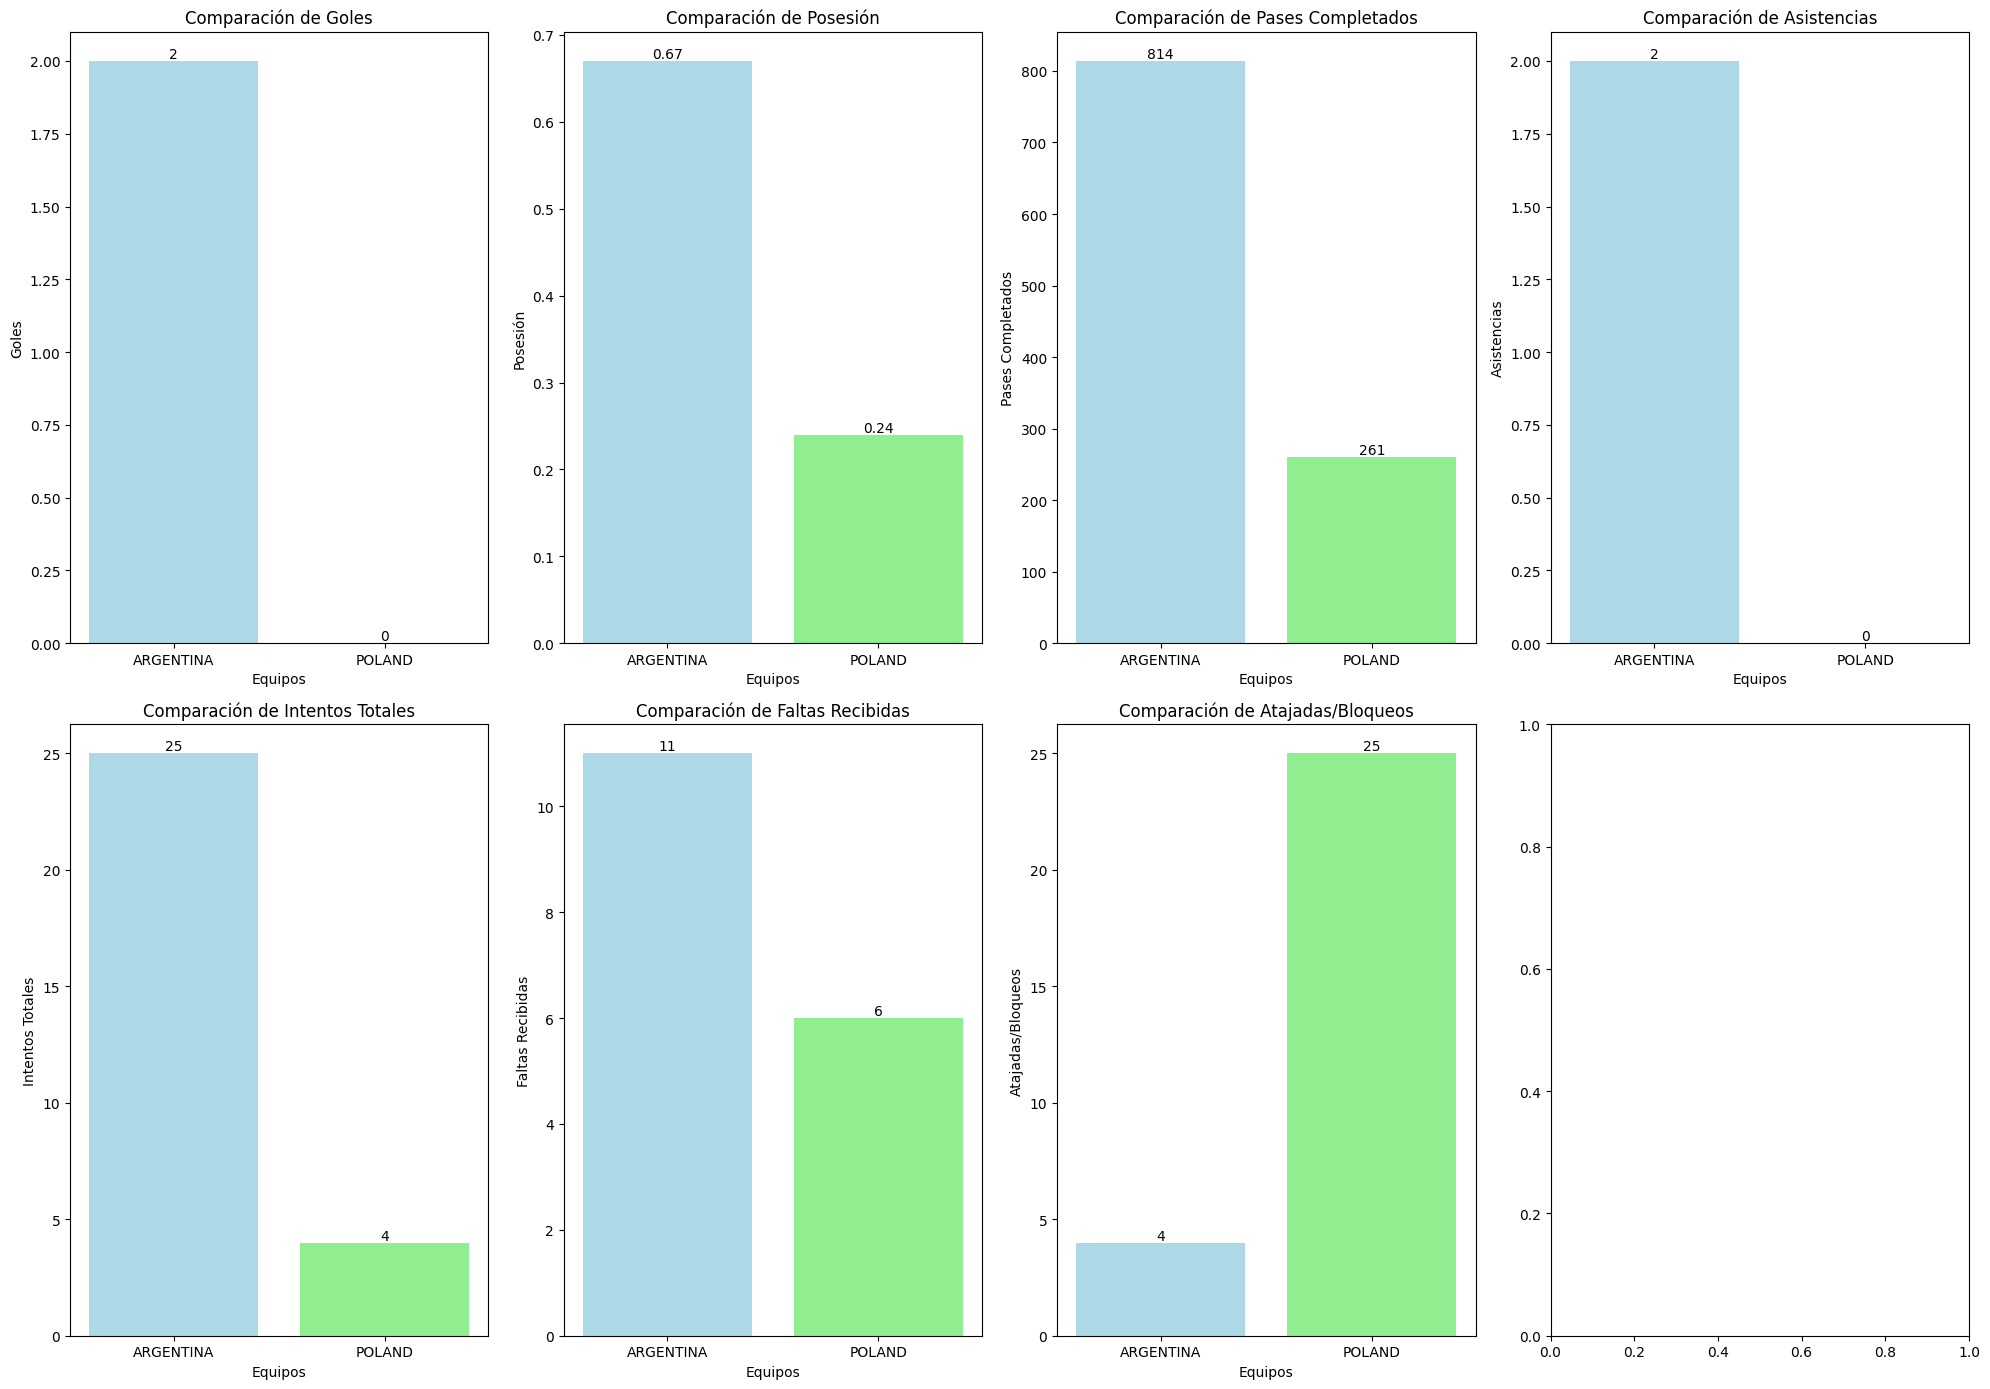

In [ ]:
# Asegurarse de que el partido fue encontrado
if not tercer_partido.empty:
    tercer_partido = tercer_partido.iloc[0]  # Obtener la primera fila como una Serie

    # Definir las columnas a graficar
    columnas_graficos = [
        'Goles', 'Posesión', 'Pases Completados', 'Asistencias',
        'Intentos Totales', 'Faltas Recibidas', 'Atajadas/Bloqueos'
    ]

    # Crear una figura con subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 14))  # 2 filas, 4 columnas

    # Dibujar gráficos para cada columna
    for ax, columna in zip(axs.flatten(), columnas_graficos):
        columna_team1 = columna + ' Equipo 1'
        columna_team2 = columna + ' Equipo 2'

        # Verificar si las columnas existen
        if columna_team1 not in tercer_partido.index or columna_team2 not in tercer_partido.index:
            print(f"Columnas {columna_team1} o {columna_team2} no existen.")
            continue

        # Extraer datos
        valor_argentina = tercer_partido[columna_team1] if tercer_partido['Equipo 1'] == 'ARGENTINA' else tercer_partido[columna_team2]
        valor_rival = tercer_partido[columna_team2] if tercer_partido['Equipo 1'] == 'ARGENTINA' else tercer_partido[columna_team1]

        # Crear gráfico de barras
        equipos = ['ARGENTINA', 'POLAND']
        valores = [valor_argentina, valor_rival]

        bars = ax.bar(equipos, valores, color=['lightblue', 'lightgreen'])
        ax.set_title(f'Comparación de {columna}')
        ax.set_ylabel(columna)
        ax.set_xlabel('Equipos')

        # Agregar los valores encima de las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.2f}' if isinstance(height, float) else f'{int(height)}',
                    ha='center', va='bottom')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró el partido entre Argentina y Polonia.")

## Octavos de final: Partido 4 vs Australia
Primer partido de eliminación directa, el combinado nacional consigue una sólida victoria por 2 goles a 1 para pasar a los cuartos de final. Messi y Julián Álvarez convirtieron para la Selección Argentina.

In [ ]:
cuarto_partido = df_argentina[(df_argentina['Equipo 1'] == 'ARGENTINA') & (df_argentina['Equipo 2'] == 'AUSTRALIA') |
                              (df_argentina['Equipo 2'] == 'ARGENTINA') & (df_argentina['Equipo 1'] == 'AUSTRALIA')]

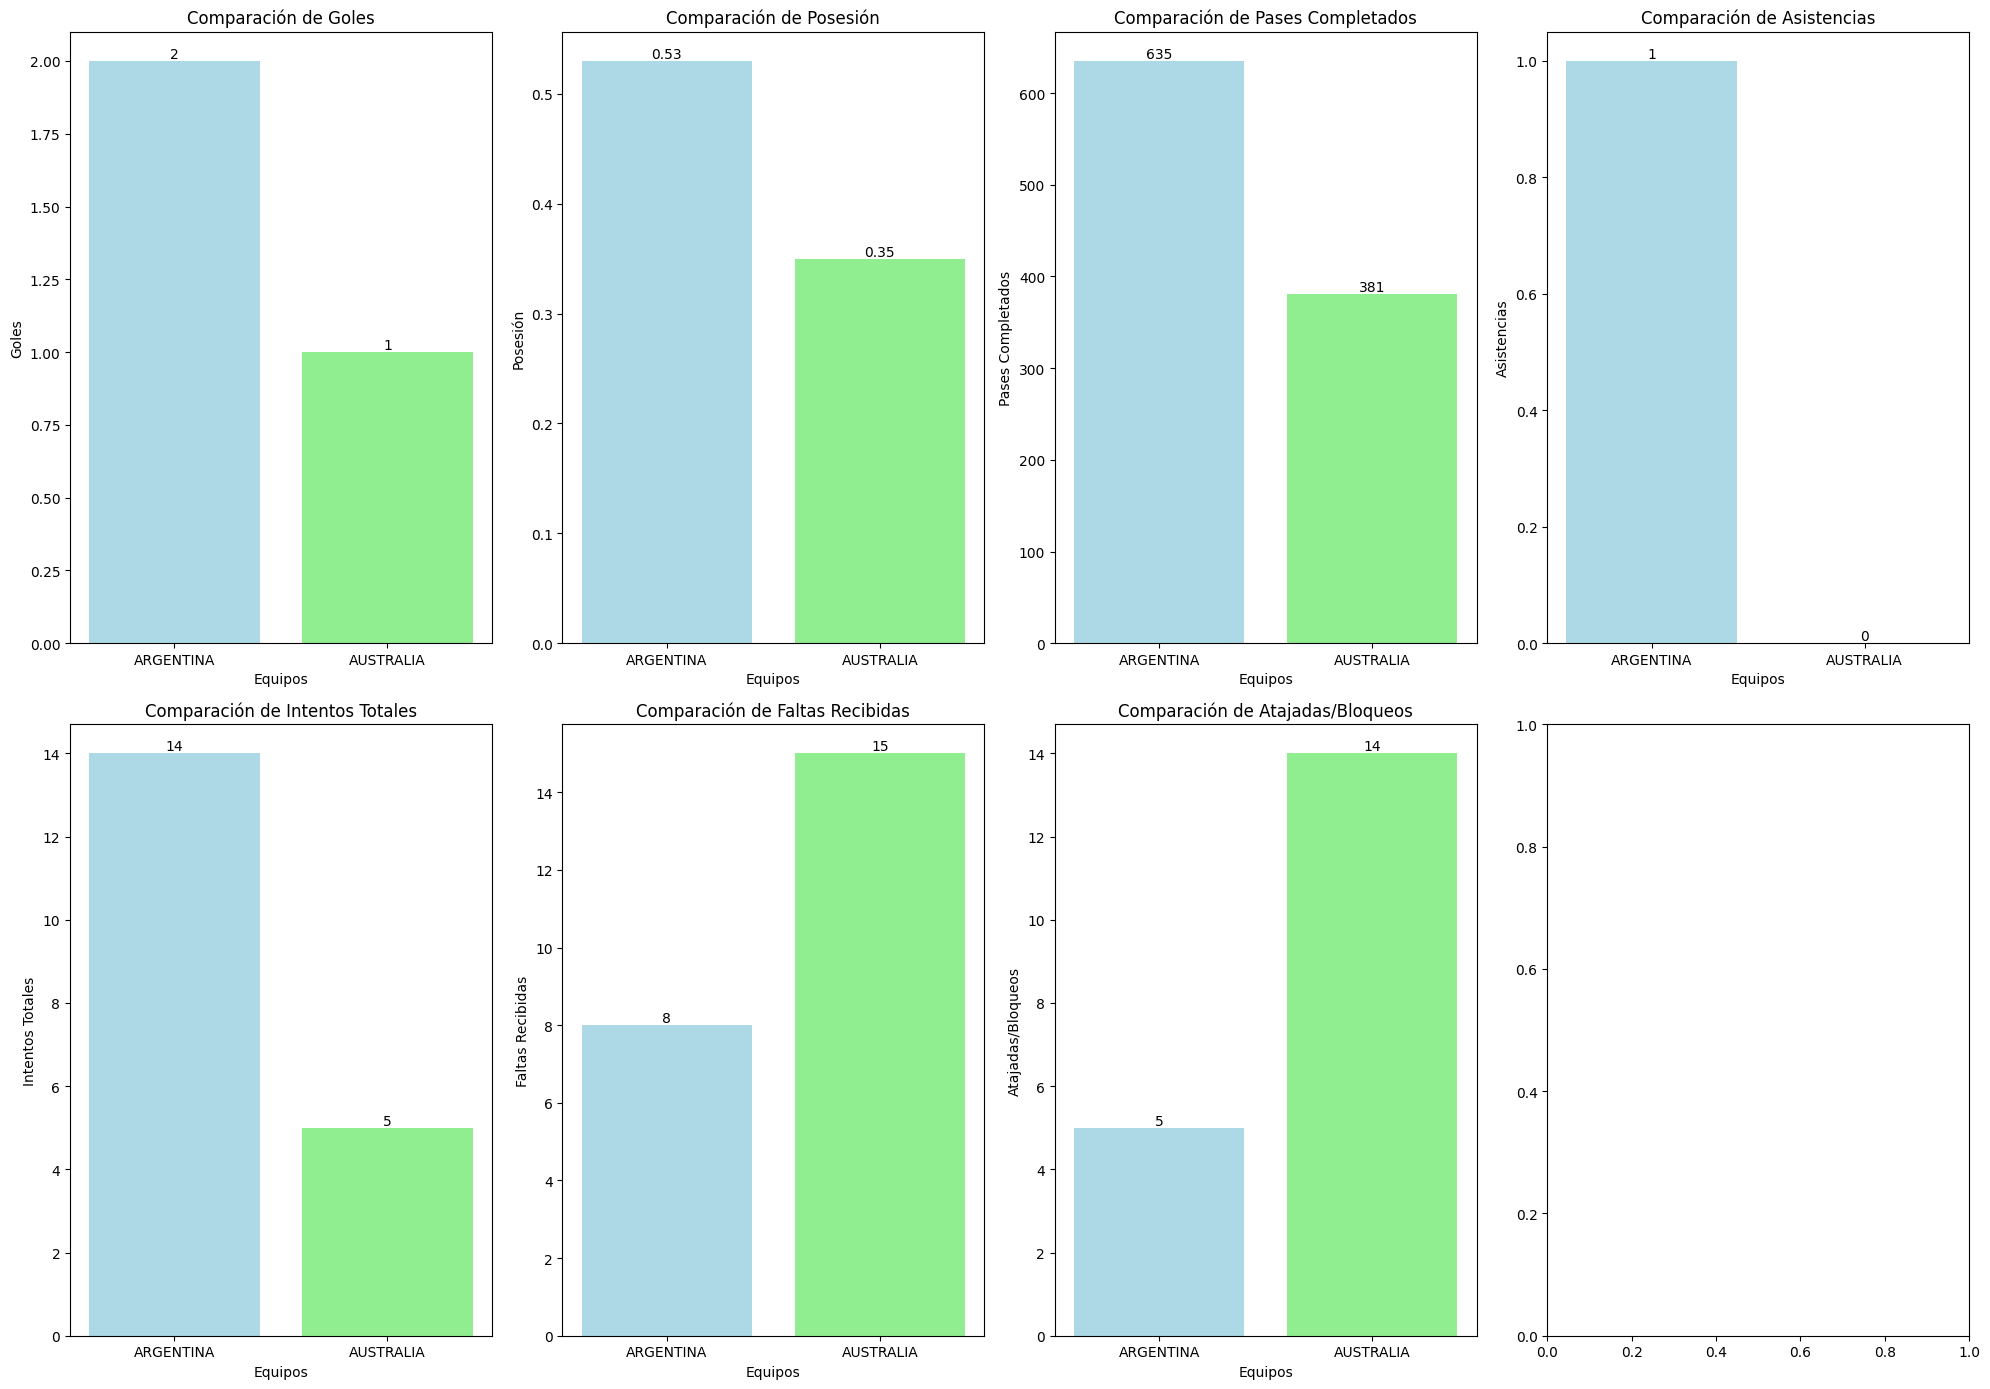

In [ ]:
# Asegurarse de que el partido fue encontrado
if not cuarto_partido.empty:
    cuarto_partido = cuarto_partido.iloc[0]  # Obtener la primera fila como una Serie

    # Definir las columnas a graficar
    columnas_graficos = [
        'Goles', 'Posesión', 'Pases Completados', 'Asistencias',
        'Intentos Totales', 'Faltas Recibidas', 'Atajadas/Bloqueos'
    ]

    # Crear una figura con subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 14))  # 2 filas, 4 columnas

    # Dibujar gráficos para cada columna
    for ax, columna in zip(axs.flatten(), columnas_graficos):
        columna_team1 = columna + ' Equipo 1'
        columna_team2 = columna + ' Equipo 2'

        # Verificar si las columnas existen
        if columna_team1 not in cuarto_partido.index or columna_team2 not in cuarto_partido.index:
            print(f"Columnas {columna_team1} o {columna_team2} no existen.")
            continue

        # Extraer datos
        valor_argentina = cuarto_partido[columna_team1] if cuarto_partido['Equipo 1'] == 'ARGENTINA' else cuarto_partido[columna_team2]
        valor_rival = cuarto_partido[columna_team2] if cuarto_partido['Equipo 1'] == 'ARGENTINA' else cuarto_partido[columna_team1]

        # Crear gráfico de barras
        equipos = ['ARGENTINA', 'AUSTRALIA']
        valores = [valor_argentina, valor_rival]

        bars = ax.bar(equipos, valores, color=['lightblue', 'lightgreen'])
        ax.set_title(f'Comparación de {columna}')
        ax.set_ylabel(columna)
        ax.set_xlabel('Equipos')

        # Agregar los valores encima de las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.2f}' if isinstance(height, float) else f'{int(height)}',
                    ha='center', va='bottom')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró el partido entre Argentina y Australia.")

## Cuartos de final: Partido 5 vs Países Bajos
La batalla de Lusail, el partido más picado del mundial, necesario para que surja el carácter del equipo. La victoria parecía asegurada con goles de Nahuel Molina y Messi pero sobre el final del partido lo empata Países Bajos. En el tiempo extra Argentina se muestra claramente superior pero no consigue plasmarlo en el resultado, la definición es por penales. Aparece nuevamente la figura del arquero argentino, Dibu Martínez, que ataja dos penales para asegurar la clasificación a la semifinal.

In [ ]:
quinto_partido = df_argentina[(df_argentina['Equipo 1'] == 'ARGENTINA') & (df_argentina['Equipo 2'] == 'NETHERLANDS') |
                              (df_argentina['Equipo 2'] == 'ARGENTINA') & (df_argentina['Equipo 1'] == 'NETHERLANDS')]

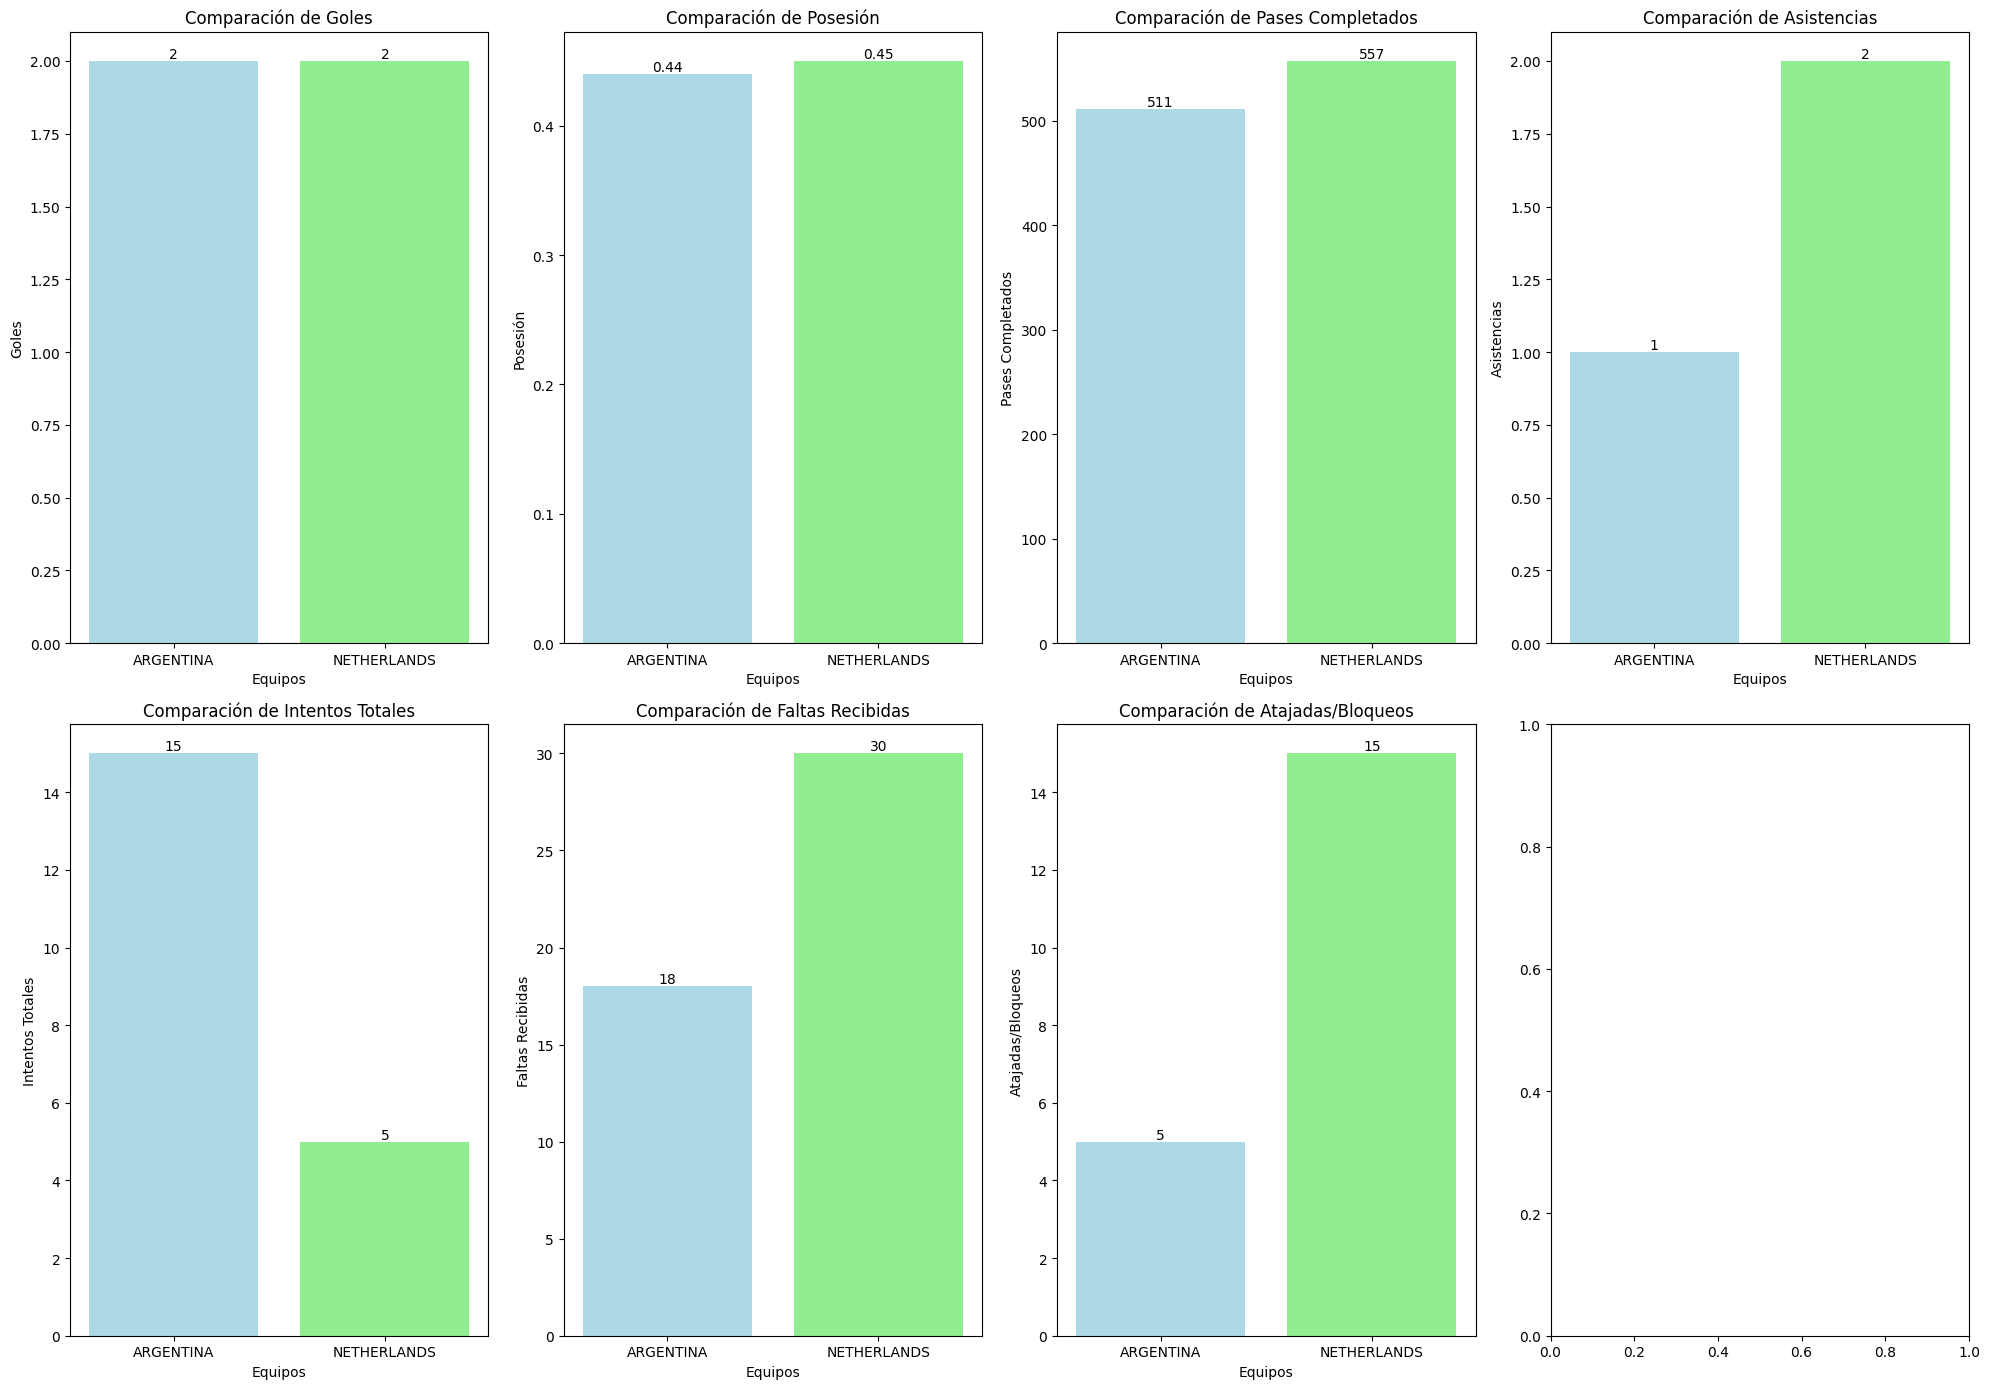

In [ ]:
# Asegurarse de que el partido fue encontrado
if not quinto_partido.empty:
    quinto_partido = quinto_partido.iloc[0]  # Obtener la primera fila como una Serie

    # Definir las columnas a graficar
    columnas_graficos = [
        'Goles', 'Posesión', 'Pases Completados', 'Asistencias',
        'Intentos Totales', 'Faltas Recibidas', 'Atajadas/Bloqueos'
    ]

    # Crear una figura con subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 14))  # 2 filas, 4 columnas

    # Dibujar gráficos para cada columna
    for ax, columna in zip(axs.flatten(), columnas_graficos):
        columna_team1 = columna + ' Equipo 1'
        columna_team2 = columna + ' Equipo 2'

        # Verificar si las columnas existen
        if columna_team1 not in quinto_partido.index or columna_team2 not in quinto_partido.index:
            print(f"Columnas {columna_team1} o {columna_team2} no existen.")
            continue

        # Extraer datos
        valor_argentina = quinto_partido[columna_team1] if quinto_partido['Equipo 1'] == 'ARGENTINA' else quinto_partido[columna_team2]
        valor_rival = quinto_partido[columna_team2] if quinto_partido['Equipo 1'] == 'ARGENTINA' else quinto_partido[columna_team1]

        # Crear gráfico de barras
        equipos = ['ARGENTINA', 'NETHERLANDS']
        valores = [valor_argentina, valor_rival]

        bars = ax.bar(equipos, valores, color=['lightblue', 'lightgreen'])
        ax.set_title(f'Comparación de {columna}')
        ax.set_ylabel(columna)
        ax.set_xlabel('Equipos')

        # Agregar los valores encima de las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.2f}' if isinstance(height, float) else f'{int(height)}',
                    ha='center', va='bottom')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró el partido entre Argentina y Países Bajos.")

## Semifinal: Partido 6 vs Croacia
Goleada por 3 a 0 en el mejor partido de la albiceleste. Goles de Messi y Julián Álvarez por duplicado para alcanzar una vez más la final del mundial. El objetivo de jugar los 7 partidos estaba cumplido.

In [ ]:
sexto_partido = df_argentina[(df_argentina['Equipo 1'] == 'ARGENTINA') & (df_argentina['Equipo 2'] == 'CROATIA') |
                              (df_argentina['Equipo 2'] == 'ARGENTINA') & (df_argentina['Equipo 1'] == 'CROATIA')]

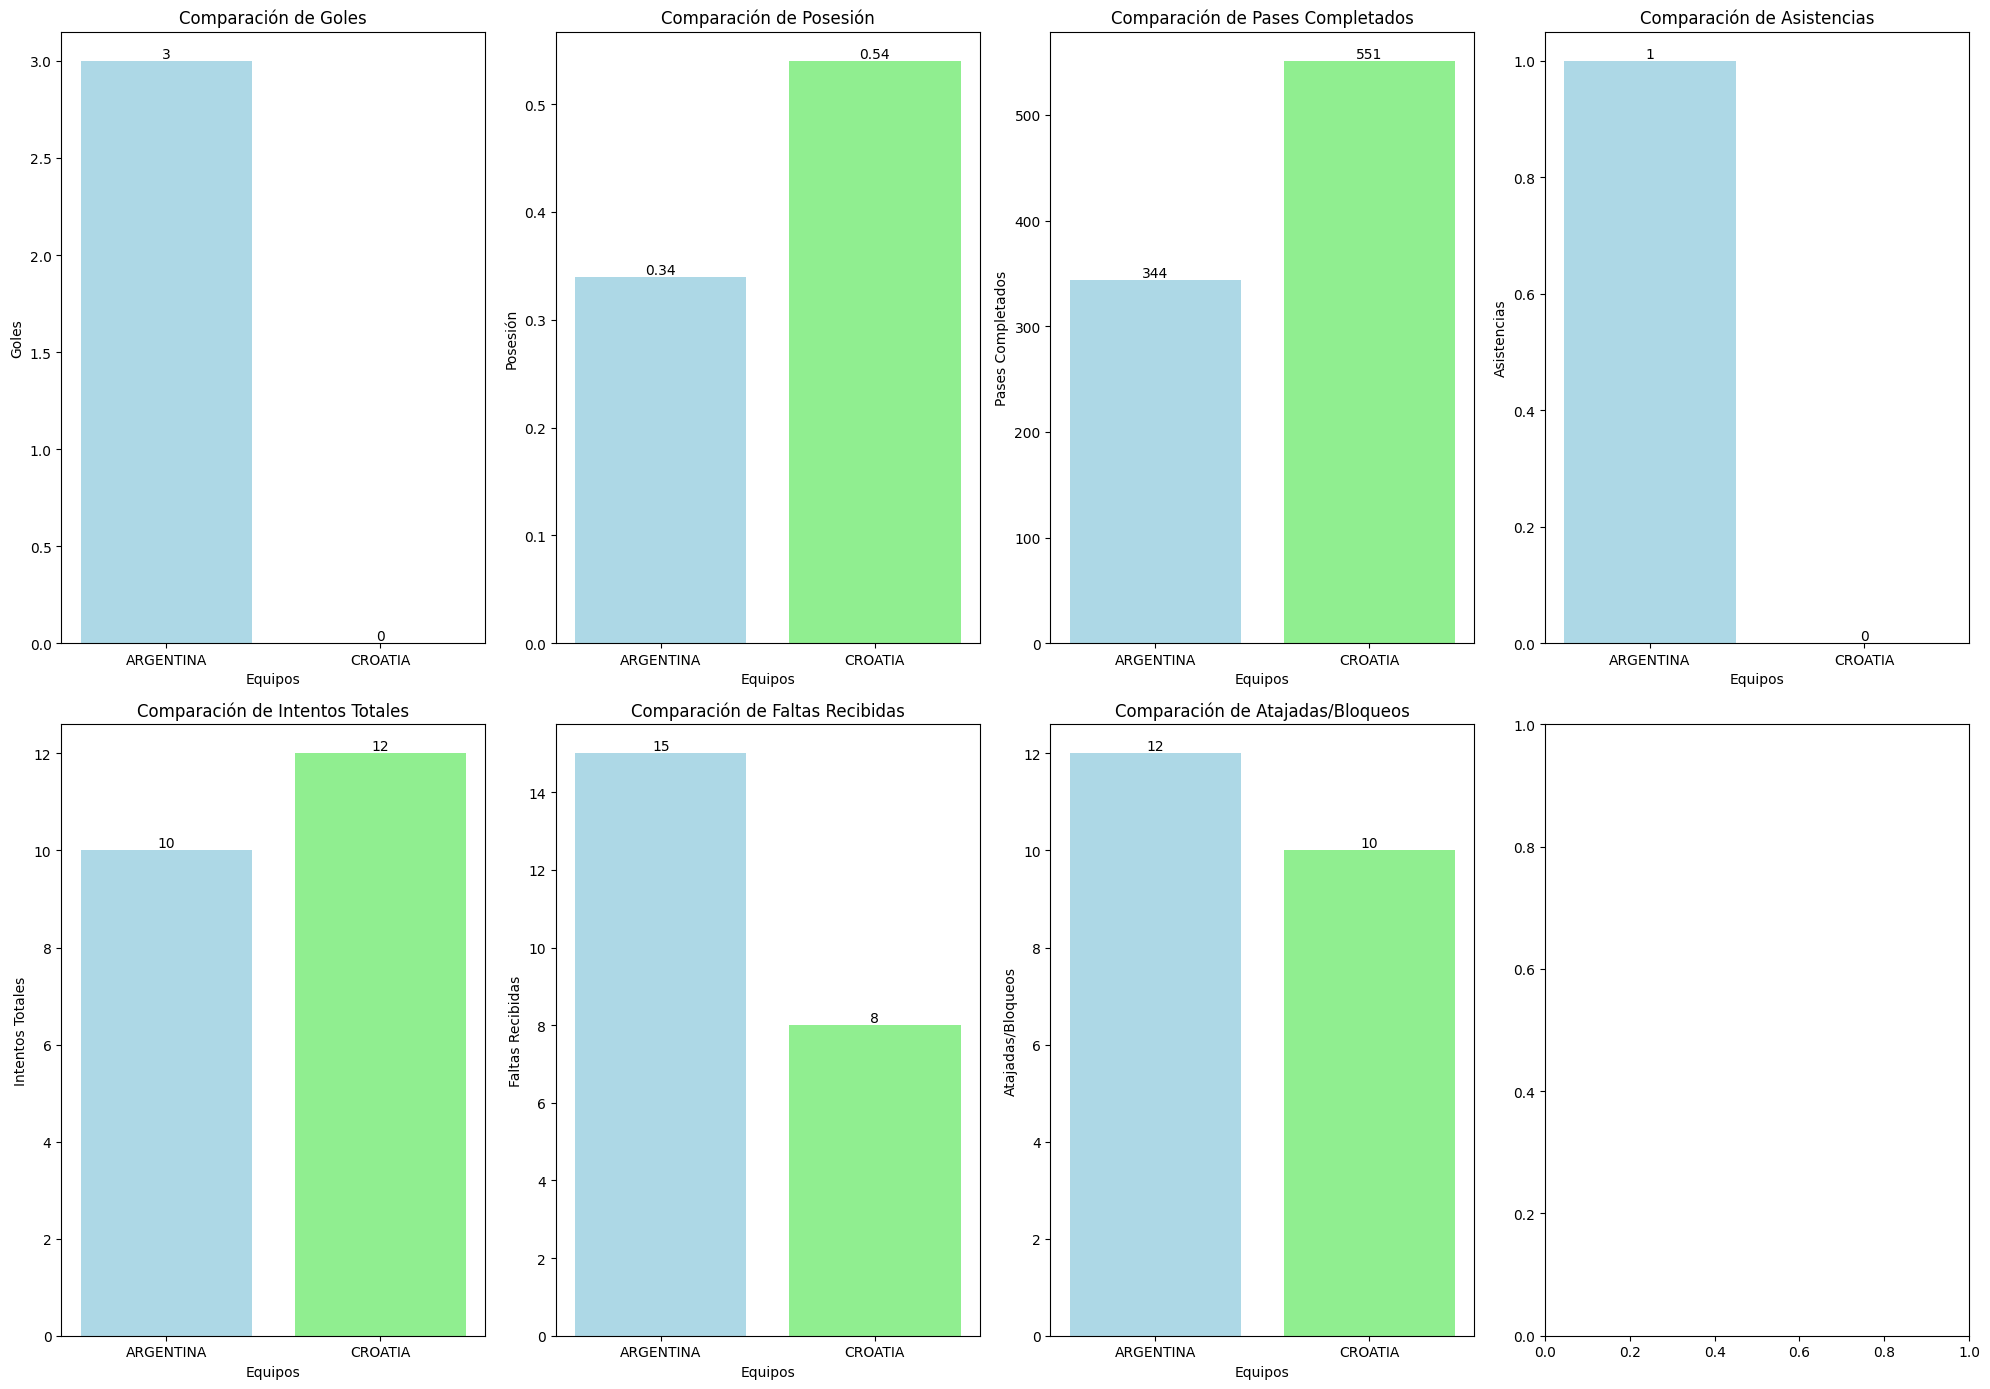

In [ ]:
# Asegurarse de que el partido fue encontrado
if not sexto_partido.empty:
    sexto_partido = sexto_partido.iloc[0]  # Obtener la primera fila como una Serie

    # Definir las columnas a graficar
    columnas_graficos = [
        'Goles', 'Posesión', 'Pases Completados', 'Asistencias',
        'Intentos Totales', 'Faltas Recibidas', 'Atajadas/Bloqueos'
    ]

    # Crear una figura con subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 14))  # 2 filas, 4 columnas

    # Dibujar gráficos para cada columna
    for ax, columna in zip(axs.flatten(), columnas_graficos):
        columna_team1 = columna + ' Equipo 1'
        columna_team2 = columna + ' Equipo 2'

        # Verificar si las columnas existen
        if columna_team1 not in sexto_partido.index or columna_team2 not in sexto_partido.index:
            print(f"Columnas {columna_team1} o {columna_team2} no existen.")
            continue

        # Extraer datos
        valor_argentina = sexto_partido[columna_team1] if sexto_partido['Equipo 1'] == 'ARGENTINA' else sexto_partido[columna_team2]
        valor_rival = sexto_partido[columna_team2] if sexto_partido['Equipo 1'] == 'ARGENTINA' else sexto_partido[columna_team1]

        # Crear gráfico de barras
        equipos = ['ARGENTINA', 'CROATIA']
        valores = [valor_argentina, valor_rival]

        bars = ax.bar(equipos, valores, color=['lightblue', 'lightgreen'])
        ax.set_title(f'Comparación de {columna}')
        ax.set_ylabel(columna)
        ax.set_xlabel('Equipos')

        # Agregar los valores encima de las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.2f}' if isinstance(height, float) else f'{int(height)}',
                    ha='center', va='bottom')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró el partido entre Argentina y Croacia.")

## Final: Partido 7 vs Francia
Argentina enfrentaba al campeón defensor, el mejor rival posible para poner a prueba a un equipo que llegaba como candidato al título. La mejor final de la historia de los mundiales, con un resultado de 3 a 3 en los 90 minutos y definición por penales. Argentina dominó con contundencia los primeros 70 minutos del partido, con goles de Messi de penal y de Di María, en el mejor gol de la historia en finales de mundiales. Pero los logros argentinos no llegan sin drama. El talento individual de Kylian Mbappé, les permitió empatar sobre la hora y llevar el partido al alargue. Gol de Messi para el 3 a 2, pero nuevamente iguala las cosas la figura francesa. Con el tiempo cumplido, en el minuto 120, Dibu Martínez le ataja un remate a Kolo Muani para seguir con vida. Si algo le faltaba a este partido, era una definición por penales. Dibu que está hecho para estas cosas, vuelve a ser la figura atajando un penal y, más otro errado por Francia, se cerraba la victoria argentina por 4 a 2.

In [ ]:
septimo_partido = df_argentina[(df_argentina['Equipo 1'] == 'ARGENTINA') & (df_argentina['Equipo 2'] == 'FRANCE') |
                              (df_argentina['Equipo 2'] == 'ARGENTINA') & (df_argentina['Equipo 1'] == 'FRANCE')]

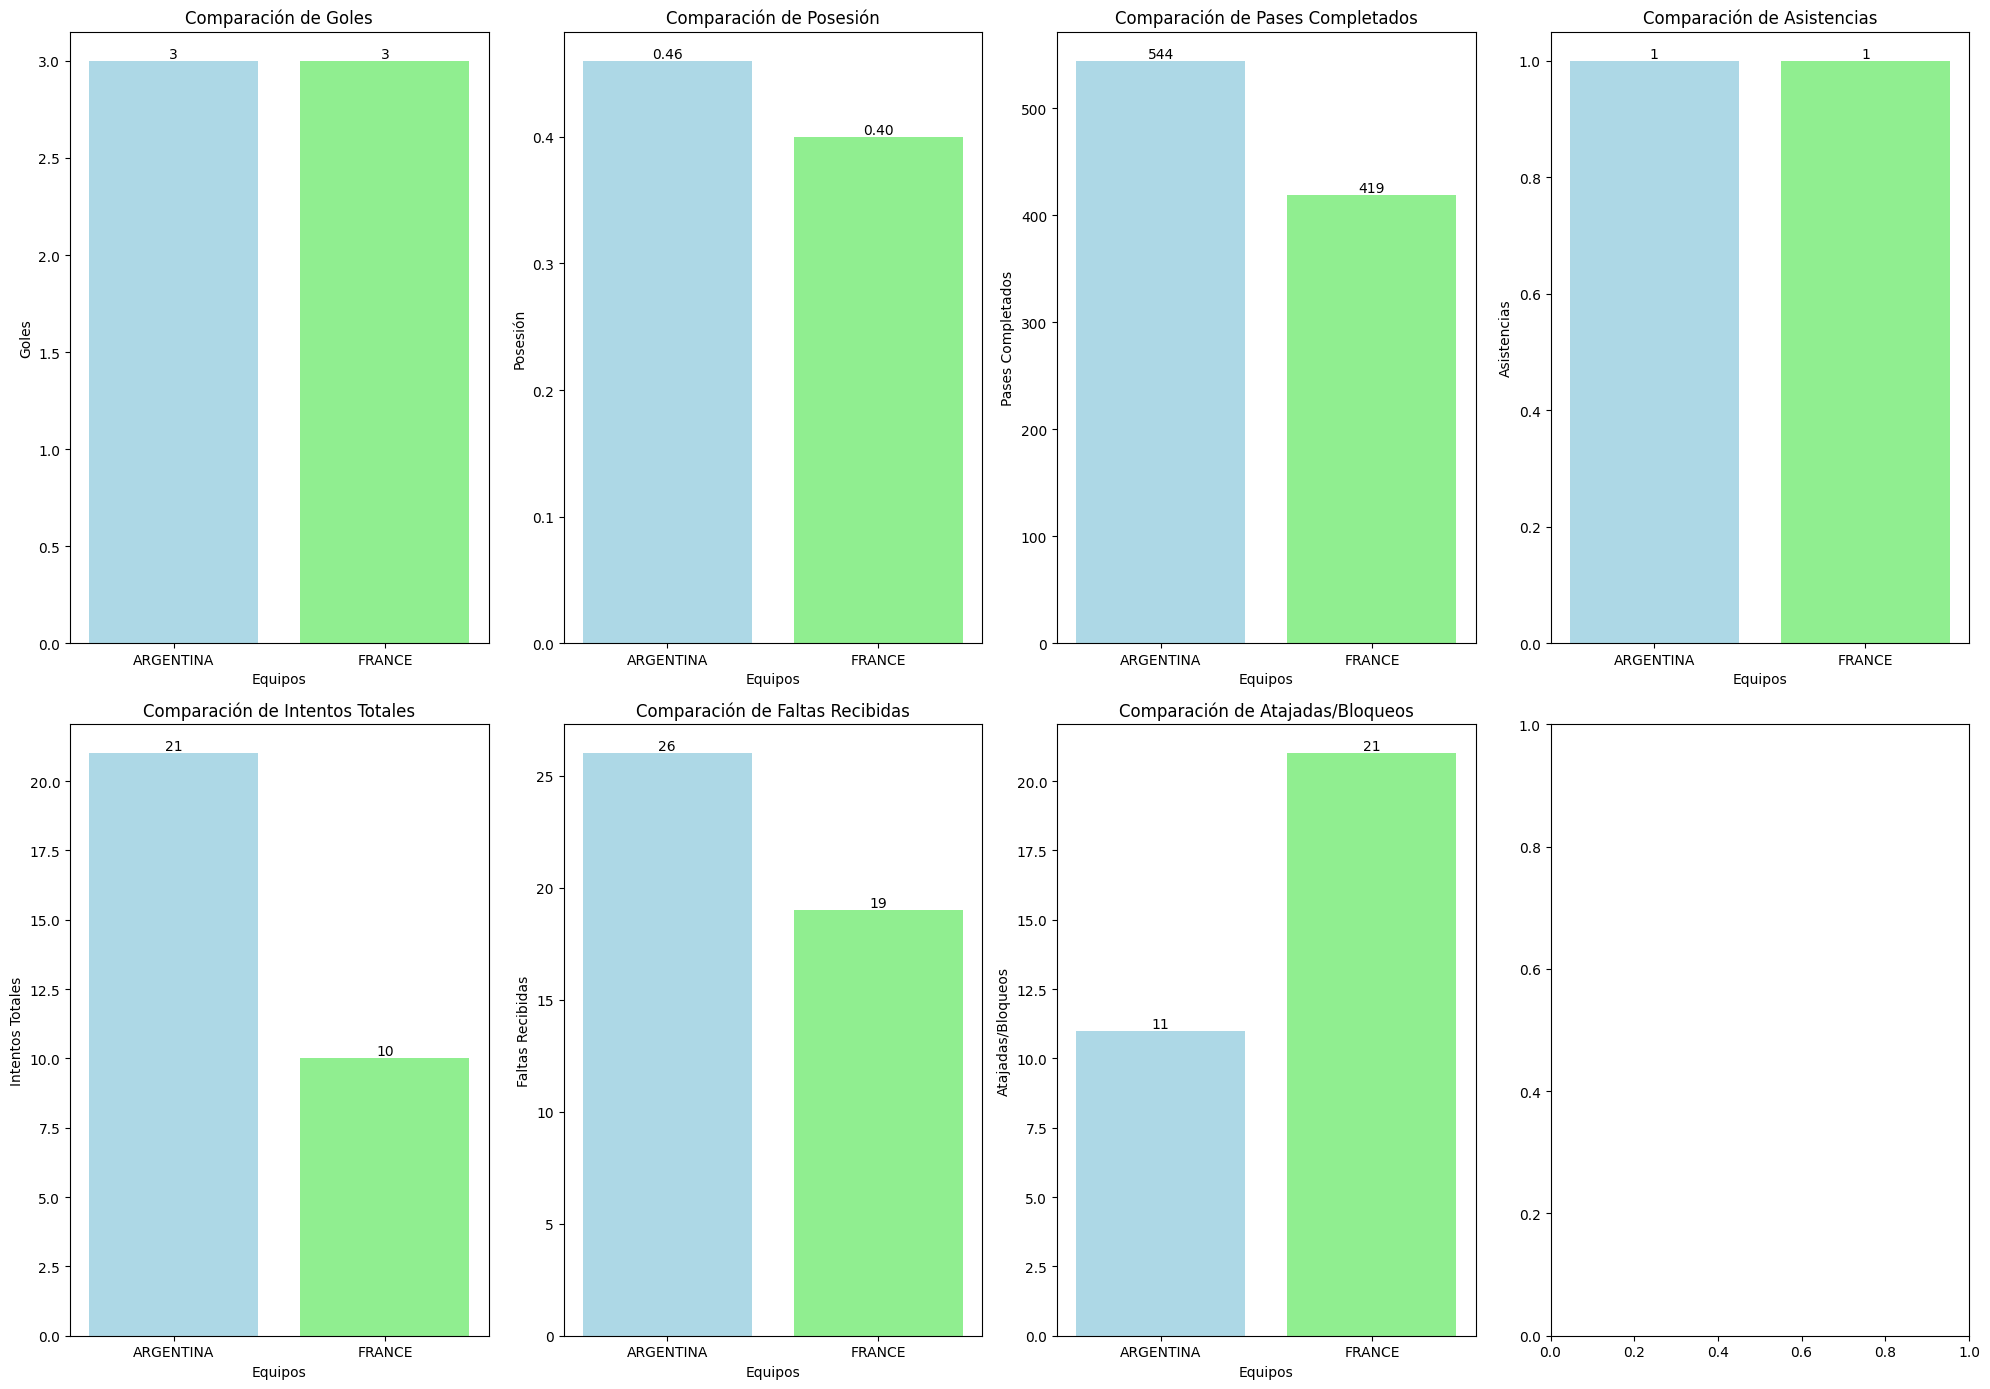

In [ ]:
# Asegurarse de que el partido fue encontrado
if not septimo_partido.empty:
    septimo_partido = septimo_partido.iloc[0]  # Obtener la primera fila como una Serie

    # Definir las columnas a graficar
    columnas_graficos = [
        'Goles', 'Posesión', 'Pases Completados', 'Asistencias',
        'Intentos Totales', 'Faltas Recibidas', 'Atajadas/Bloqueos'
    ]

    # Crear una figura con subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 14))  # 2 filas, 4 columnas

    # Dibujar gráficos para cada columna
    for ax, columna in zip(axs.flatten(), columnas_graficos):
        columna_team1 = columna + ' Equipo 1'
        columna_team2 = columna + ' Equipo 2'

        # Verificar si las columnas existen
        if columna_team1 not in septimo_partido.index or columna_team2 not in septimo_partido.index:
            print(f"Columnas {columna_team1} o {columna_team2} no existen.")
            continue

        # Extraer datos
        valor_argentina = septimo_partido[columna_team1] if septimo_partido['Equipo 1'] == 'ARGENTINA' else septimo_partido[columna_team2]
        valor_rival = septimo_partido[columna_team2] if septimo_partido['Equipo 1'] == 'ARGENTINA' else septimo_partido[columna_team1]

        # Crear gráfico de barras
        equipos = ['ARGENTINA', 'FRANCE']
        valores = [valor_argentina, valor_rival]

        bars = ax.bar(equipos, valores, color=['lightblue', 'lightgreen'])
        ax.set_title(f'Comparación de {columna}')
        ax.set_ylabel(columna)
        ax.set_xlabel('Equipos')

        # Agregar los valores encima de las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.2f}' if isinstance(height, float) else f'{int(height)}',
                    ha='center', va='bottom')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró el partido entre Argentina y Francia.")

## Comparamos los promedios de los valores de todas las selecciones
Buscamos evaluar el rendimiento de la Selección Argentina comparado con todos los equipos participantes

## Creamos una lista de los equipos del mundial

In [ ]:
lista_equipos = df['team1'].unique()
print(lista_equipos)
len(lista_equipos)  # Cantidad de equipos

['QATAR' 'ENGLAND' 'SENEGAL' 'UNITED STATES' 'ARGENTINA' 'DENMARK'
 'MEXICO' 'FRANCE' 'MOROCCO' 'GERMANY' 'SPAIN' 'BELGIUM' 'SWITZERLAND'
 'URUGUAY' 'PORTUGAL' 'BRAZIL' 'WALES' 'NETHERLANDS' 'TUNISIA' 'POLAND'
 'JAPAN' 'CROATIA' 'CAMEROON' 'KOREA REPUBLIC' 'ECUADOR' 'IRAN'
 'AUSTRALIA' 'SAUDI ARABIA' 'CANADA' 'COSTA RICA' 'GHANA' 'SERBIA']


32

## Calculamos los promedios de todos los equipos con una función

In [ ]:
# Función para calcular el promedio de las columnas relevantes para un equipo
def calcular_promedios_equipo(df, equipo):
    # Filtrar filas donde el equipo se encuentra en las columnas 'team1' o 'team2'
    filtro_team1 = df['team1'] == equipo
    filtro_team2 = df['team2'] == equipo

    df_team1 = df[filtro_team1]
    df_team2 = df[filtro_team2]

    # Seleccionar sólo las columnas numéricas para 'team1' y 'team2'
    columnas_numericas_team1 = [col for col in df.columns if 'team1' in col and df[col].dtype in ['int64', 'float64']]
    columnas_numericas_team2 = [col for col in df.columns if 'team2' in col and df[col].dtype in ['int64', 'float64']]

    # Cambiar el nombre de las columnas de 'team2' para que coincidan con las de 'team1'
    df_team2_renamed = df_team2[columnas_numericas_team2].rename(columns=lambda x: x.replace('team2', 'team1'))

    # Concatenar los datos filtrados de 'team1' y 'team2'
    df_combined = pd.concat([df_team1[columnas_numericas_team1], df_team2_renamed])

    # Calcular el promedio de las columnas numéricas
    promedios = df_combined.mean()

    return promedios

## Promedios de Argentina

In [ ]:
pd.DataFrame(calcular_promedios_equipo(df, "ARGENTINA"))

,0
number of goals team1,2.142857
total attempts team1,14.857143
conceded team1,1.142857
goal inside the penalty area team1,2.000000
goal outside the penalty area team1,0.142857
assists team1,1.142857
on target attempts team1,6.857143
off target attempts team1,6.000000
attempts inside the penalty area team1,8.000000
attempts outside the penalty area team1,5.428571


## Diccionario para almacenar los promedios de cada equipo

In [ ]:
promedios_equipos = {}

# Calcular los promedios para cada equipo y almacenarlos en el diccionario
for equipo in lista_equipos:
    promedios_equipos[equipo] = calcular_promedios_equipo(df, equipo)

# Convertir el diccionario a un DataFrame para una mejor visualización
df_promedios_equipos = pd.DataFrame(promedios_equipos).transpose()

## Promedios de todos los equipos

In [ ]:
df_promedios_equipos

,number of goals team1,total attempts team1,conceded team1,goal inside the penalty area team1,goal outside the penalty area team1,assists team1,on target attempts team1,off target attempts team1,attempts inside the penalty area team1,attempts outside the penalty area team1,...,corners team1,free kicks team1,penalties scored team1,goal preventions team1,own goals team1,forced turnovers team1,defensive pressures applied team1,attempts inside the penalty area team1,completed line breaks team1,completed defensive line breaks team1
QATAR,0.333333,7.000000,2.333333,0.333333,0.000000,0.333333,2.000000,4.666667,3.000000,4.333333,...,3.000000,19.333333,0.000000,10.666667,0.000000,57.000000,295.333333,2.000000,107.000000,10.000000
ENGLAND,2.600000,12.000000,0.800000,2.400000,0.200000,2.200000,5.400000,4.200000,7.250000,3.600000,...,5.000000,14.800000,0.200000,9.000000,0.000000,56.000000,199.000000,13.000000,131.000000,8.000000
SENEGAL,1.250000,12.750000,1.750000,1.250000,0.000000,0.500000,3.500000,7.000000,7.000000,4.750000,...,5.500000,15.750000,0.250000,9.000000,0.000000,66.500000,269.250000,8.333333,94.333333,9.333333
UNITED STATES,0.750000,11.500000,1.000000,0.750000,0.000000,0.750000,3.750000,4.750000,4.000000,4.250000,...,5.500000,11.500000,0.000000,8.500000,0.000000,73.250000,287.500000,8.333333,115.666667,12.666667
ARGENTINA,2.142857,14.857143,1.142857,2.000000,0.142857,1.142857,6.857143,6.000000,8.000000,5.428571,...,5.571429,17.571429,0.571429,6.428571,0.142857,70.571429,241.142857,13.000000,155.000000,13.500000
DENMARK,0.333333,11.666667,1.000000,0.333333,0.000000,0.333333,3.000000,5.666667,7.000000,4.000000,...,7.000000,9.333333,0.000000,13.333333,0.000000,70.333333,223.000000,8.000000,152.000000,16.000000
MEXICO,0.666667,14.000000,1.000000,0.333333,0.333333,0.333333,5.000000,5.000000,10.000000,7.000000,...,5.333333,18.333333,0.000000,7.666667,0.000000,72.000000,249.666667,5.500000,93.500000,10.500000
FRANCE,2.285714,14.428571,1.142857,2.142857,0.142857,1.714286,5.000000,6.000000,14.000000,4.000000,...,5.428571,14.000000,0.285714,11.428571,0.000000,74.857143,283.714286,5.666667,95.000000,7.000000
MOROCCO,0.857143,8.714286,0.714286,0.714286,0.142857,0.571429,2.428571,4.000000,3.666667,3.857143,...,1.714286,14.571429,0.000000,11.000000,0.142857,77.714286,359.428571,5.750000,91.500000,8.500000
GERMANY,2.000000,22.333333,1.666667,2.000000,0.000000,1.666667,8.000000,11.000000,15.000000,7.000000,...,8.333333,13.000000,0.333333,9.000000,0.000000,77.666667,260.333333,15.500000,121.000000,16.000000


## Calculamos el promedio general de todos los equipos

In [ ]:
promedio_general = df_promedios_equipos.mean()

## Obtenemos los promedios de Argentina

In [ ]:
promedio_argentina = df_promedios_equipos.loc['ARGENTINA']

## Creamos un dataframe para comparar a Argentina con el promedio general

In [ ]:
df_comparacion = pd.DataFrame({
    'Argentina': promedio_argentina,
    'Promedio General': promedio_general
})

# Comparacion entre argentina y el promedio de equipos
df_comparacion

,Argentina,Promedio General
number of goals team1,2.142857,1.243080
total attempts team1,14.857143,10.970461
conceded team1,1.142857,1.434375
goal inside the penalty area team1,2.000000,1.130952
goal outside the penalty area team1,0.142857,0.093899
assists team1,1.142857,0.875149
on target attempts team1,6.857143,3.817783
off target attempts team1,6.000000,4.838839
attempts inside the penalty area team1,8.000000,6.664062
attempts outside the penalty area team1,5.428571,4.208631


## Graficamos la comparativa de promedios

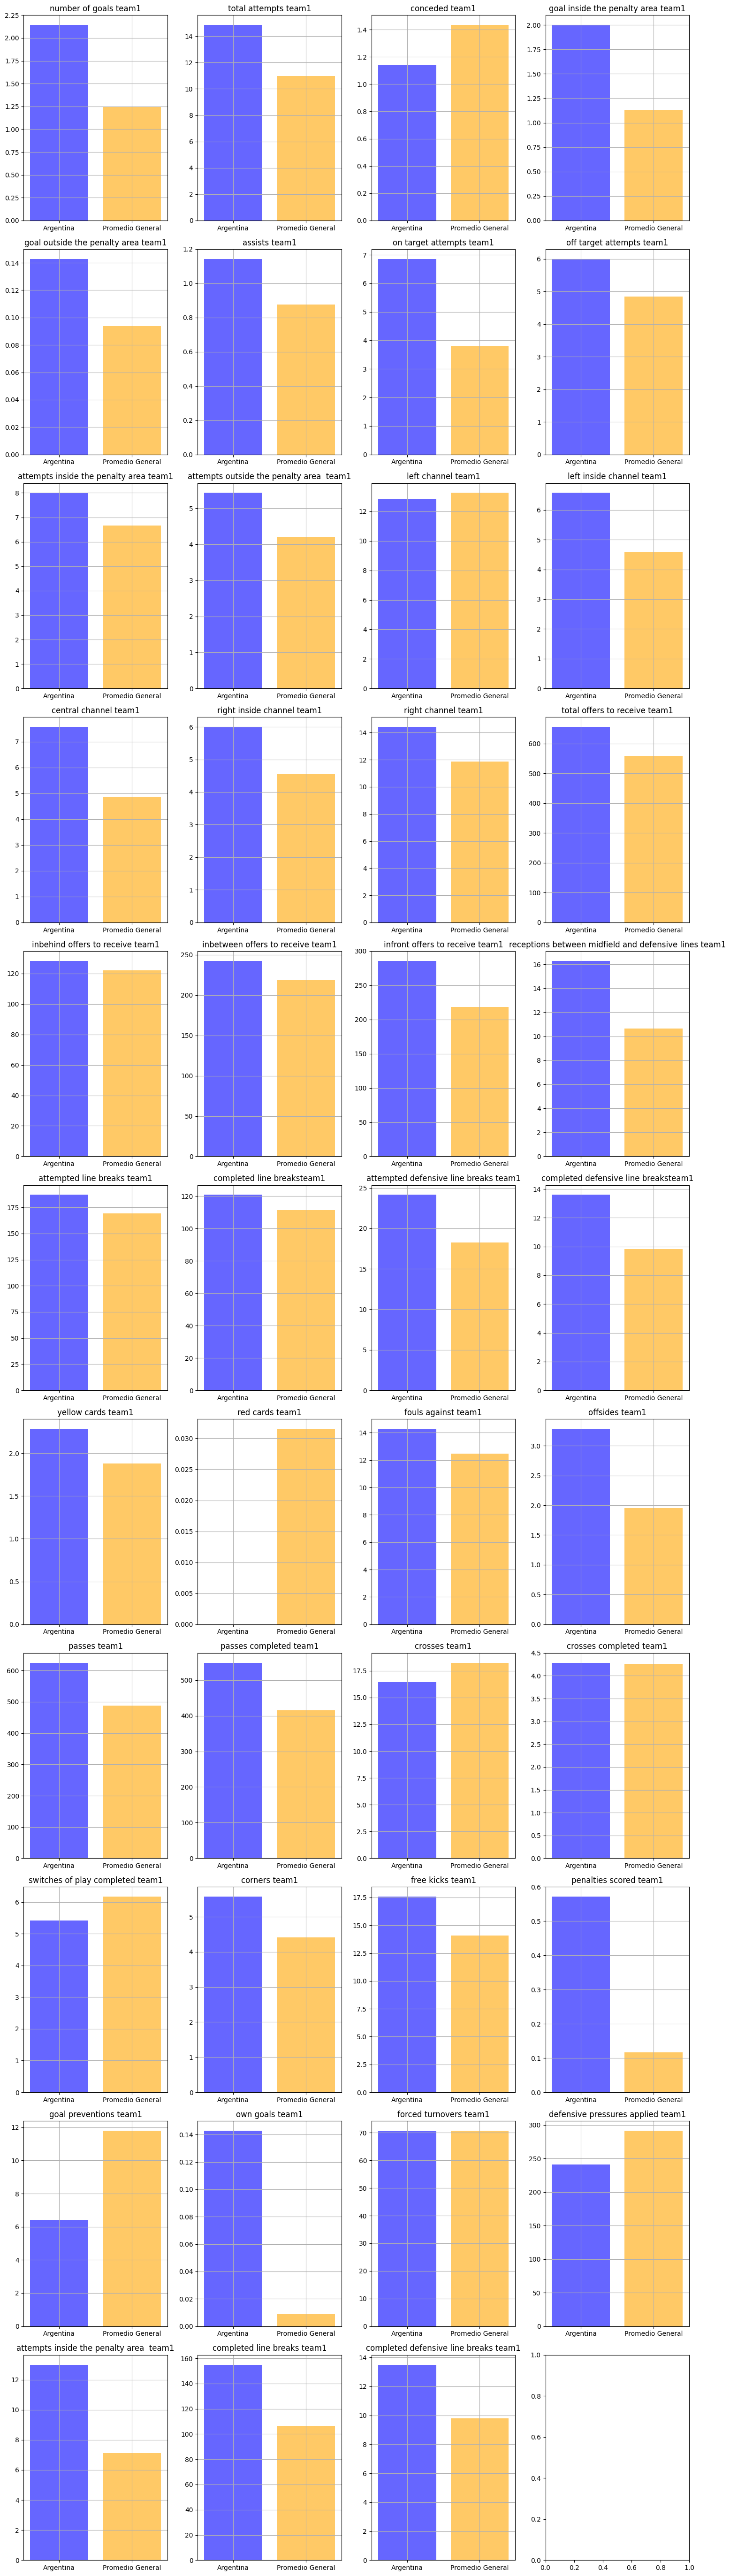

In [ ]:
# Seleccionar algunas métricas para graficar
metricas_seleccionadas = df_promedios_equipos.columns

# Calcula el número de columnas necesarias para organizar los subplots
num_metrics = len(metricas_seleccionadas)
num_cols = 4  # Puedes ajustar el número de columnas
num_rows = (num_metrics + num_cols - 1) // num_cols  # Calcula el número de filas necesario

# Define el tamaño de la figura en función del número de subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Itera sobre las métricas seleccionadas y crea un subplot para cada una
for i, metrica in enumerate(metricas_seleccionadas):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].bar(['Argentina', 'Promedio General'], df_comparacion.loc[metrica], color=['blue', 'orange'], alpha=0.6)
    axs[row, col].set_title(metrica)  # Título del subplot
    axs[row, col].grid(True)

# Ajusta el espaciado entre subplots y elimina subplots no utilizados
plt.tight_layout()

# Muestra el gráfico
plt.show()

## Conclusiones
"Fútbol: dinámica de lo impensado", así se llama un libro escrito por el periodista argentino Dante Panzeri en 1967. En esa época ya advertía el autor que el fútbol estaba perdiendo su condición de juego y se transformaba en una industria, en un espectáculo. Que era sobreanalizado por el periodismo y por los intelectuales de la época, que usaban palabras difíciles para que parezca novedoso. "Por más orden que busquemos, por más ciencia que hagamos, el partido se decide por el arte de lo imprevisto, y porque el chico del barrio se despierta con buen pie". El título de ese libro se convirtió en una frase recurrente en el periodismo argentino para explicar algunas situaciones del fútbol que salen de la lógica. Algo de eso siempre hay.

Desde las estadísticas presentadas en este trabajo, podemos ver que Argentina no solo fue superior a sus rivales, sino también al promedio de todos los equipos participantes. Sin embargo, los números nos demuestran cantidad de goles, remates al arco, atajadas, etc., pero no nos dicen nada sobre la calidad de esos datos. Es que para la estadística, todos los pases suman uno, pero no todos los pases son iguales. En el segundo gol argentino en la final, se juntaron 5 pases que significaron el mejor gol de la historia en finales de mundiales. Perdida en una columna de este dataframe llamada 'Goal preventions' o 'Goles evitados', hay una atajada de Dibu Martínez que es fundamental, a los 120 minutos de la final, el mano a mano a Kolo Muani significó la chance de definir por penales y no ver arruinado un partidazo de la Selección Argentina. Por otro lado, el seleccionado nacional eliminó a dos rivales por penales y eso no figura en este dataset.

Argentina tuvo al mejor jugador de su historia, Lionel Messi, en una actuación excelente, siendo elegido como la figura del mundial. De él podremos tener registrados sus goles o sus pases, pero nada sobre su talento para resolver las situaciones difíciles y su importancia como capitán. Podríamos concluir que el análisis de los datos nos demuestran la superioridad argentina en todas las facetas del juego, pero que en situaciones determinantes necesitó del talento indivudual, de la habilidad para resolver, de una pizca de la dinámica de lo impensado.